In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in all the necessary datasets and print out heads to see how they link to each other

# boxscores information shows us information for each player per fixture they have played
df_boxscores = pd.read_csv('Boxscores.csv', index_col=0)
print(df_boxscores.shape)
df_boxscores.head()

(548000, 13)


,FixtureURL,Team,Player,MinutesPlayed,Points,FieldGoals,FieldGoalsAttempted,ThreePointers,ThreePointersAttempted,FreeThrows,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds
0,/boxscores/200310280LAL.html,DAL,10,34 days 22:59:59,4,2,5,0,0,0,0,0,3
1,/boxscores/200310280LAL.html,DAL,11,34 days 22:59:59,4,2,2,0,0,0,0,1,0
2,/boxscores/200310280LAL.html,DAL,12,34 days 22:59:59,1,0,0,0,0,1,2,0,0
3,/boxscores/200310280LAL.html,LAL,13,34 days 22:59:59,16,6,14,1,5,3,5,0,3
4,/boxscores/200310280LAL.html,LAL,14,34 days 22:59:59,21,10,20,-500,4,0,0,1,6


In [4]:
# We can see negative three pointers as well as 'high' values that seem unreasonable.
# e.g. a player is very unlikely to have made 500 3 pointers
df_boxscores.describe()

,Player,Points,FieldGoals,FieldGoalsAttempted,ThreePointers,ThreePointersAttempted,FreeThrows,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds
count,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.00000,548000.000000
mean,818.764239,9.907447,3.674843,8.045805,0.815675,2.281447,1.742082,2.286493,1.03752,3.075945
std,564.931206,8.270016,3.095062,5.793553,1.582787,2.641138,2.380647,2.911524,1.41169,2.719647
min,-1.000000,0.000000,0.000000,0.000000,-500.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,342.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,774.000000,8.000000,3.000000,7.000000,0.000000,1.000000,1.000000,2.000000,1.00000,2.000000
75%,1188.000000,15.000000,5.000000,12.000000,1.000000,4.000000,3.000000,4.000000,2.00000,4.000000
max,2535.000000,81.000000,28.000000,50.000000,500.000000,24.000000,26.000000,39.000000,18.00000,25.000000


In [5]:
# Some things to look out for: 
# having more 3 pointers made than actual attempts
print(df_boxscores[df_boxscores['ThreePointers'] > df_boxscores['ThreePointersAttempted']][['ThreePointers', 'ThreePointersAttempted']])

# get rid of those rows
df_boxscores = df_boxscores.drop([16, 352754])
print(df_boxscores.shape)

        ThreePointers  ThreePointersAttempted
16                500                       0
352754              6                       1
(547998, 13)


In [6]:
# having an unrealistic number of 3 pointers attempted (e.g. 1000 or -10). Look at negative values first.
print(df_boxscores[df_boxscores['ThreePointers'] < 0][['ThreePointers']])
print(df_boxscores[df_boxscores['ThreePointersAttempted'] < 0][['ThreePointersAttempted']])

# get rid of those rows
df_boxscores = df_boxscores.drop([4])
print(df_boxscores.shape)

   ThreePointers
4           -500
Empty DataFrame
Columns: [ThreePointersAttempted]
Index: []
(547997, 13)


              Player         Points     FieldGoals  FieldGoalsAttempted  \
count  547997.000000  547997.000000  547997.000000        547997.000000   
mean      818.766765       9.907414       3.674827             8.045781   
std       564.930549       8.269982       3.095043             5.793524   
min        -1.000000       0.000000       0.000000             0.000000   
25%       342.000000       3.000000       1.000000             4.000000   
50%       774.000000       8.000000       3.000000             7.000000   
75%      1188.000000      15.000000       5.000000            12.000000   
max      2535.000000      81.000000      28.000000            50.000000   

       ThreePointers  ThreePointersAttempted     FreeThrows  \
count  547997.000000           547997.000000  547997.000000   
mean        0.815669                2.281450       1.742090   
std         1.262047                2.641142       2.380651   
min         0.000000                0.000000       0.000000   
25%      

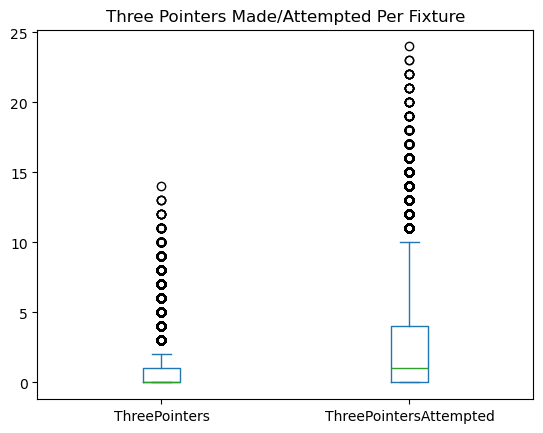

In [7]:
# Look at other outliers
print(df_boxscores.describe())

# These 'outliers' all look reasonable, so no need to get rid of any of the rows
ax = df_boxscores[['ThreePointers', 'ThreePointersAttempted']].plot(kind='box', title='Three Pointers Made/Attempted Per Fixture')
plt.show()

In [9]:
# fixtures information shows us each fixture's id and the season the fixture corresponds to
df_fixtures = pd.read_csv('Fixtures.csv', index_col=0)
print(df_fixtures.shape)
df_fixtures.head()

(26375, 2)


,Season,FixtureKey
0,2004.0,NaN
1,2004.0,/boxscores/200310280SAS.html
2,NaN,/boxscores/200310290BOS.html
3,2004.0,/boxscores/200310290CHI.html
4,2004.0,/boxscores/200310290DEN.html


In [10]:
# Can see some rows with NaNs. Remove those from the dataframe
df_fixtures = df_fixtures.dropna()
print(df_fixtures.shape)

(26368, 2)


In [11]:
# players information shows us each player's height, weight, dob and full name
df_players = pd.read_csv('Players.csv', index_col=0)
print(df_players.shape)
df_players.head()

(2562, 6)


,PlayerID,FirstName,Surname,Height,Weight,DOB
0,1,Antoine,Walker,80.0,224,8/12/1976
2561,2,Dirk,Nowitzki,84.0,245,6/19/1978
1,2,Dirk,Nowitzki,84.0,245,6/19/1978
2,3,Michael,Finley,79.0,215,3/6/1973
3,4,Steve,Nash,75.0,195,2/7/1974


In [12]:
# Can see a duplicate, check for others and remove from the dataframe
print(df_players[df_players.duplicated(keep='last')])

# There's only 1 duplicate entry, so get rid of duplicate row
df_players = df_players.drop([2561])
print(df_players[df_players.duplicated(keep='last')])
df_players

      PlayerID FirstName   Surname  Height  Weight        DOB
2561         2      Dirk  Nowitzki    84.0     245  6/19/1978
Empty DataFrame
Columns: [PlayerID, FirstName, Surname, Height, Weight, DOB]
Index: []


,PlayerID,FirstName,Surname,Height,Weight,DOB
0,1,Antoine,Walker,80.000000,224,8/12/1976
1,2,Dirk,Nowitzki,84.000000,245,6/19/1978
2,3,Michael,Finley,79.000000,215,3/6/1973
3,4,Steve,Nash,75.000000,195,2/7/1974
4,5,Danny,Fortson,79.000000,260,3/27/1976
...,...,...,...,...,...,...
2556,2557,Gui,Santos,78.000000,185,6/22/2002
2557,2558,Dmytro,Skapintsev,85.039416,215,5/12/1998
2558,2559,Damion,Baugh,76.000000,194,8/3/2000
2559,2560,Vincent,Valerio-Bodon,81.000000,200,5/2/2001


In [13]:
# Now that we have all the data imported and cleaned, let's compile the data into something we can use

# Columns we care about
columns = ['Player', 'Season', 'FirstName', 'Surname', 'ThreePointers', 'ThreePointersAttempted']

# Merge to get FixtureKey, Player name and season
df_merged_players = pd.merge(df_boxscores, df_players, left_on='Player', right_on='PlayerID', how='left')
df_merged = pd.merge(df_merged_players, df_fixtures, left_on='FixtureURL', right_on='FixtureKey', how='left')
df_merged[columns]

,Player,Season,FirstName,Surname,ThreePointers,ThreePointersAttempted
0,10,NaN,Josh,Howard,0,0
1,11,NaN,Shawn,Bradley,0,0
2,12,NaN,Marquis,Daniels,0,0
3,13,NaN,Derek,Fisher,1,5
4,15,NaN,Devean,George,2,3
...,...,...,...,...,...,...
547992,2450,2024.0,Toumani,Camara,0,0
547993,2452,2024.0,Scoot,Henderson,0,1
547994,2454,2024.0,Duop,Reath,1,7
547995,852,2024.0,DeMar,DeRozan,1,2


In [14]:
df_all = df_merged.copy()[columns]
df_all['Name'] = df_all['FirstName'] + ' ' + df_all['Surname']

# group by name and season
df_all = df_all[['Name', 'Season', 'ThreePointers', 'ThreePointersAttempted']].groupby(['Name', 'Season']).sum().copy()

df_all['ThreePointersMissed'] = df_all['ThreePointersAttempted'] - df_all['ThreePointers']

# get 3 point make percentage per player
df_all['ThreePointersMadePct'] = df_all['ThreePointers'] / df_all['ThreePointersAttempted']

# This is each player's make ability on a global level (NOTE this means it is not necessarily their ability in the 
# actual three point contest)
print(df_all.shape)
df_all = df_all.dropna()
print(df_all.shape)
df_all.head()

(10324, 4)
(9151, 4)


ThreePointers  ThreePointersAttempted  \
Name         Season                                          
A.J. Hammons 2017.0              5                      10   
A.J. Lawson  2023.0             10                      25   
             2024.0             12                      36   
A.J. Price   2010.0             60                     174   
             2011.0             48                     165   

                     ThreePointersMissed  ThreePointersMadePct  
Name         Season                                             
A.J. Hammons 2017.0                    5              0.500000  
A.J. Lawson  2023.0                   15              0.400000  
             2024.0                   24              0.333333  
A.J. Price   2010.0                  114              0.344828  
             2011.0                  117              0.290909

In [ ]:
df_all.to_csv('CleanedData.csv')